<a href="https://colab.research.google.com/github/likeshd/time_series_models_libraries/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting with ARIMA
Time Series Forecasting means analyzing and modeling time-series data to make future decisions. Some of the applications of Time Series Forecasting are weather forecasting, sales forecasting, business forecasting, stock price forecasting, etc. The ARIMA model is a popular statistical technique used for Time Series Forecasting.
What is ARIMA?
ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. ARIMA models have three parameters like ARIMA(p, d, q). Here p, d, and q are defined as:

p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

In [4]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta


In [7]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [20]:
data = yf.download('GOOG', start=start_date, end=end_date, progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
245 2024-03-26  151.240005  153.199997  151.029999  151.699997  151.699997   
246 2024-03-27  152.145004  152.690002  150.130005  151.940002  151.940002   
247 2024-03-28  152.000000  152.669998  151.330002  152.259995  152.259995   
248 2024-04-01  151.830002  157.000000  151.649994  156.500000  156.500000   
249 2024-04-02  154.750000  155.990005  153.460007  155.869995  155.869995   

       Volume  
245  19312700  
246  16622000  
247  21105600  
248  24469800  
249  17585200  


In [21]:
data = data[["Date", "Close"]]
data.head()

,Date,Close
0,2023-04-04,105.120003
1,2023-04-05,104.949997
2,2023-04-06,108.900002
3,2023-04-10,106.949997
4,2023-04-11,106.120003


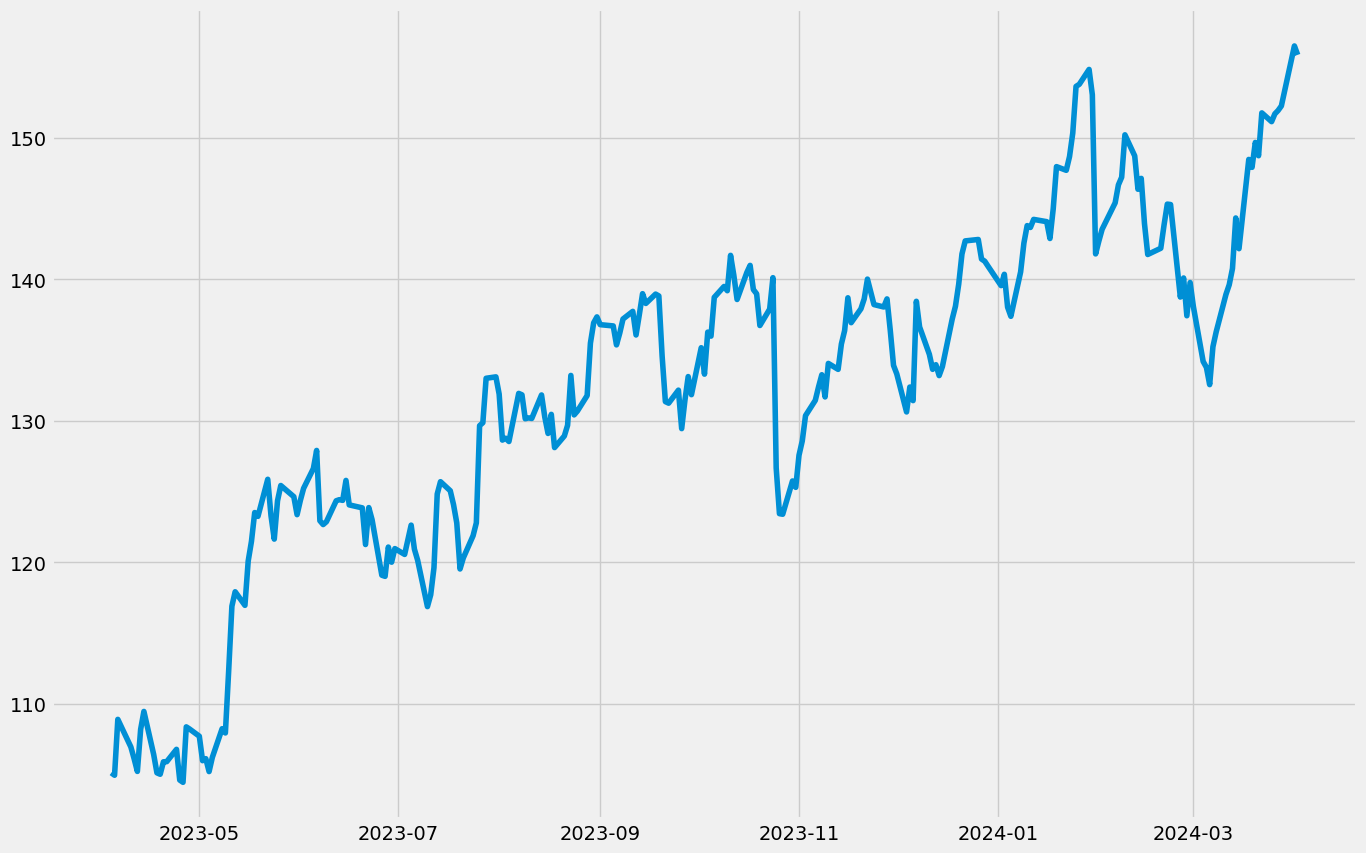

In [27]:
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

<Figure size 640x480 with 0 Axes>

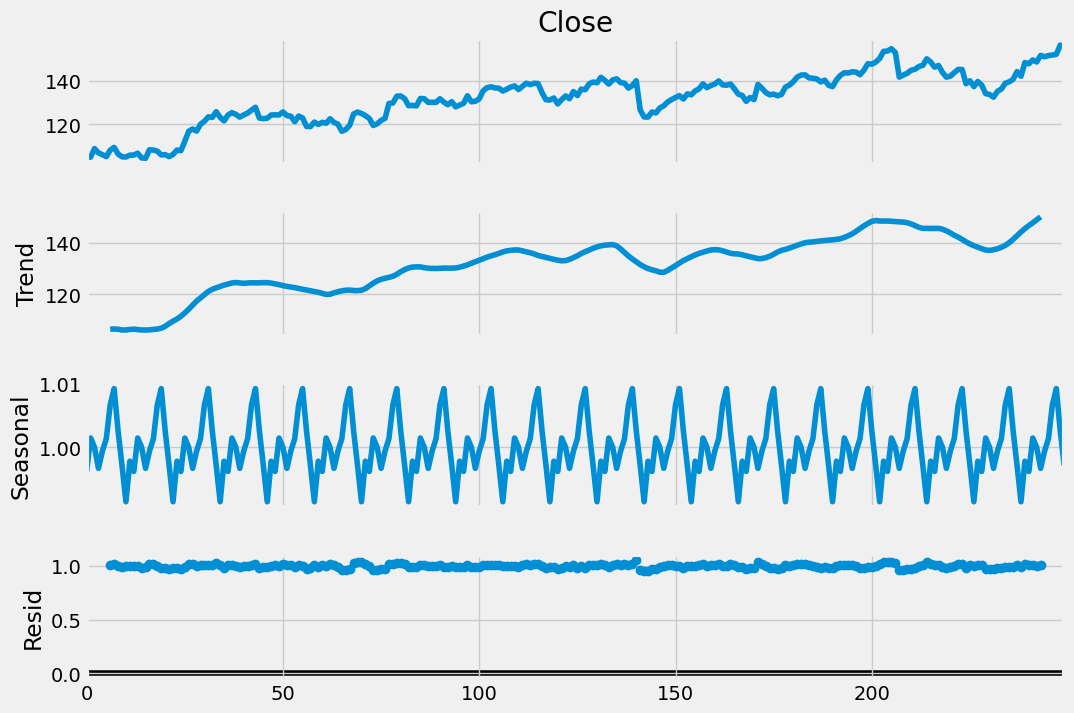

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(data["Close"],model = "multiplicative",freq = 30)
result = seasonal_decompose(data["Close"], model='multiplicative', period = 12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(12, 8)


So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. It will help you learn using both models.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

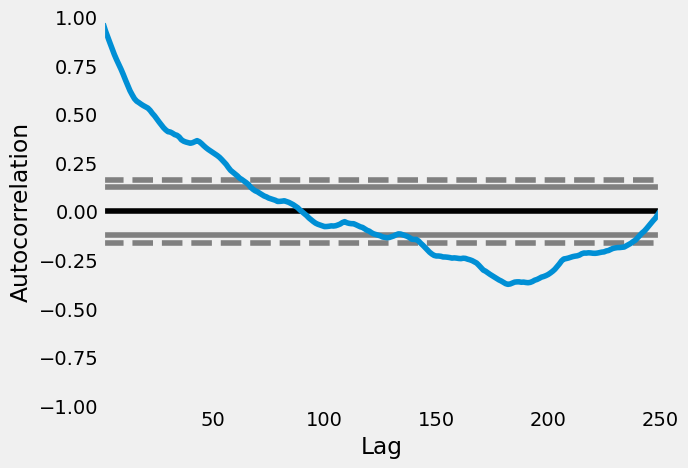

In [39]:
# to find the value of p:
pd.plotting.autocorrelation_plot(data["Close"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5

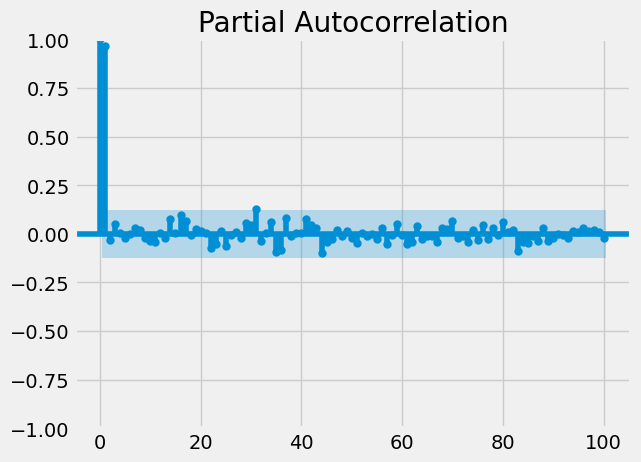

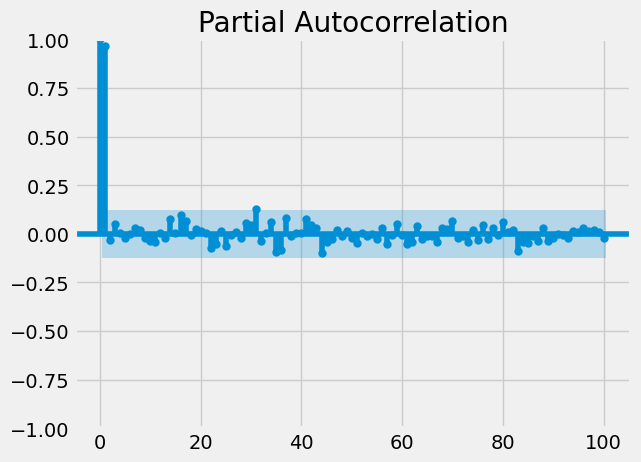

In [43]:
# to find the value of q (moving average):
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags =100)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2.

In [48]:
p,d,q = 5, 1, 2
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(data["Close"], order = (p,d,q))
# model_fit = model.fit(disp= -1)
import statsmodels.api as smapi

model = smapi.tsa.arima.ARIMA(data["Close"], order=(p,d,q))

result = model.fit()
print(result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -555.968
Date:                Wed, 03 Apr 2024   AIC                           1127.936
Time:                        06:40:09   BIC                           1156.075
Sample:                             0   HQIC                          1139.262
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2049      0.116     10.405      0.000       0.978       1.432
ar.L2         -0.8803      0.161     -5.460      0.000      -1.196      -0.564
ar.L3         -0.1043      0.133     -0.783      0.4

In [49]:
pred  = result.predict()
print(pred)

0        0.000000
1      105.120009
2      104.948050
3      108.939005
4      107.061080
          ...    
245    151.348138
246    151.048052
247    151.686941
248    151.981291
249    156.572261
Name: predicted_mean, Length: 250, dtype: float64


ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:

In [50]:
import statsmodels.api as smapi
import warnings
model = smapi.tsa.statespace.SARIMAX(data["Close"], order =(p,d,q), seasonal_order= (p,d,q,12))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -541.919
Date:                            Wed, 03 Apr 2024   AIC                           1113.837
Time:                                    06:51:43   BIC                           1165.858
Sample:                                         0   HQIC                          1134.805
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1891      0.175      6.790      0.000       0.846       1.532
ar.L2         -0.7689      0.190   

In [51]:
pred = model.predict(len(data), len(data)+10)
print(pred)

250    155.092560
251    155.622270
252    156.151409
253    156.618820
254    156.844191
255    156.351195
256    156.829411
257    157.250916
258    158.542306
259    159.516561
260    159.526886
Name: predicted_mean, dtype: float64


<Axes: >

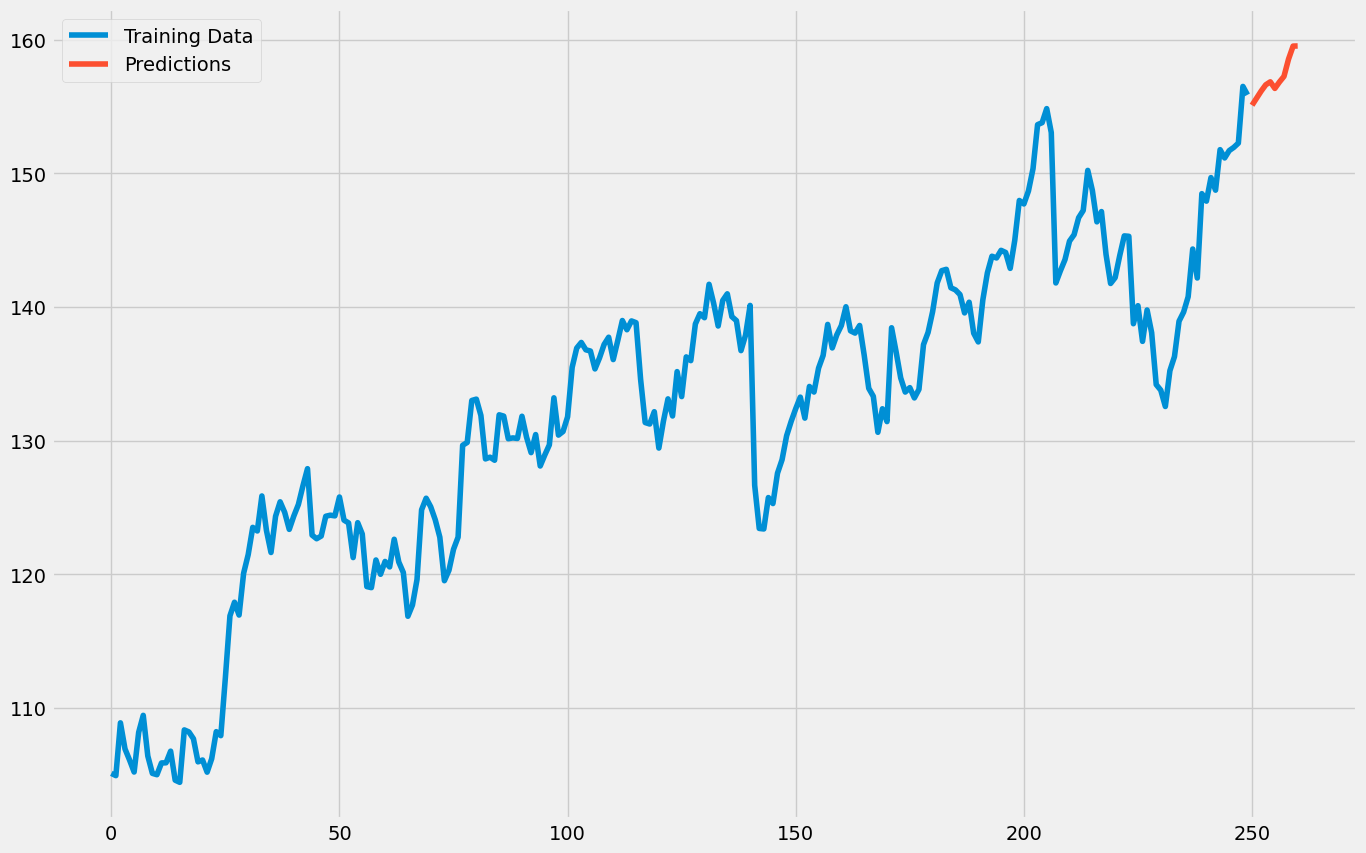

In [52]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
pred.plot(legend=True, label="Predictions")